<a href="https://colab.research.google.com/github/ishaqmarashy/Housing-Prices-ML/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Common imports
import requests
import pandas as pd
import numpy as np
import sklearn

# Plotting
%matplotlib inline
import io
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
train_df = pd.read_csv( "./sample_data/train.csv",index_col=0)
test_df = pd.read_csv("./sample_data/test.csv",index_col=0)
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df=pd.concat((train_df, test_df))
df.drop(['SalePrice'], axis=1, inplace=True)
mCol=df.isna().sum().index
for i in df.isna().sum().index:
  if df.isna().sum()[i]/len(df)>0.6:
    print('Drop',i,df.isna().sum()[i],df.isna().sum()[i]/len(df),'Missing')
    df.drop([i], axis=1, inplace=True)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric=df.select_dtypes(exclude='object')
df[numeric.columns]=pd.DataFrame(imp.fit_transform(numeric),columns=numeric.columns,index=df.index)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
included=df.select_dtypes(include='object')
df[included.columns]=pd.DataFrame(imp.fit_transform(included),columns=included.columns,index=df.index)
sp=train_df['SalePrice']
df = pd.get_dummies(df)
ntrain = train_df.shape[0]
ntest = train_df.shape[0]
train_df = df[:ntrain]
test_df = df[ntrain:]
train_df['SalePrice']=sp

Drop Alley 2721 0.9321685508735869 Missing
Drop PoolQC 2909 0.9965741692360397 Missing
Drop Fence 2348 0.8043850633778691 Missing
Drop MiscFeature 2814 0.9640287769784173 Missing


In [55]:
included=train_df.select_dtypes(exclude='object')

In [72]:
train_df[numeric.columns].hist(bins=15, figsize=(25,25))
plt.show()

NameError: ignored

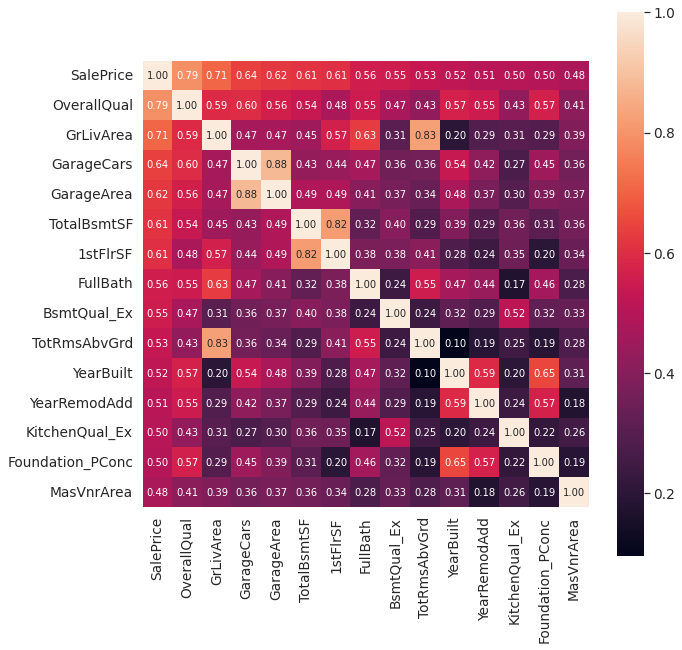

In [57]:
corrmat = train_df[included.columns].corr()
plt.figure(figsize=(10,10))
columns = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train_df[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [58]:
from pandas.plotting import scatter_matrix
plotted_features=['SalePrice','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','TotalBsmtSF','TotalBsmtSF','Fireplaces','GrLivArea','FullBath','GarageYrBlt','TotRmsAbvGrd','GarageCars','GarageArea']
plotted_features.remove('SalePrice')
temp={}
c=0
k=5
j=0

fig5, axs = plt.subplots(k,3, figsize=(25, 25))
for i in plotted_features:
  if(c%k==0 and c!=0):
    j+=1
  c+=1  
  temp[i] = sns.scatterplot(x=train_df[i], y=train_df['SalePrice'],data=train_df, ax=axs[c%k,j])
plt.show()
plotted_features+=['SalePrice']

In [59]:
train_df = train_df[train_df.TotalBsmtSF < 4500]
train_df = train_df[train_df.GrLivArea < 4500]
train_df = train_df[train_df.GarageArea < 1200]
train_df = train_df[train_df['1stFlrSF'] < 4000]
train_df = train_df[train_df.BsmtFinSF1 < 4000]

In [60]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]
X_Pred=test_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

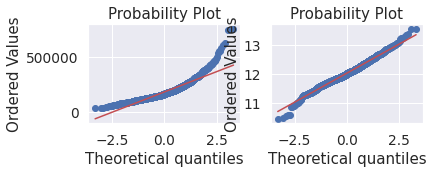

In [61]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
fig = plt.figure()
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
plt1 = stats.probplot(y, plot=ax)
plt2 = stats.probplot(np.log1p(y), plot=ax1)
plt.show()

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_log_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
predictions=pd.DataFrame(y_train,index=y_train.index)

In [63]:
lr = make_pipeline(OneHotEncoder(handle_unknown='ignore'),LinearRegression())
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test)
predictions['LinearRegression']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

1.0634871605828209e-13

In [64]:
xgb =  make_pipeline(RobustScaler(),XGBRegressor(reg='squarederror'))
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
xgb.score(X_test, y_test)
predictions['XGBRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

[14:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.006741682775179227

In [65]:
enr = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=.9, random_state=42))
enr.fit(X_train, y_train)
y_pred_train = enr.predict(X_train)
y_pred_test = enr.predict(X_test)
enr.score(X_test, y_test)
predictions['ElasticNet']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.010832376532436013

In [66]:
kr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kr.fit(X_train, y_train)
y_pred_train = kr.predict(X_train)
y_pred_test = kr.predict(X_test)
kr.score(X_test, y_test)
predictions['KernelRidge']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

1.7761654379857184e-05

In [67]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.001, random_state=42))
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
lasso.score(X_test, y_test)
predictions['Lasso']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.011038599442469014

In [68]:
gbr = GradientBoostingRegressor(n_estimators=3000, max_depth=4, min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
gbr.fit(X_train, y_train)
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
gbr.score(X_test, y_test)
predictions['GradientBoostingRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.0007041528741769647

In [69]:
from mlxtend.regressor import StackingCVRegressor

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.0001)

scv = StackingCVRegressor(regressors=(lr, lasso, enr, gbr, xgb, kr),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
scv.fit(np.array(X_train), np.array(y_train))
y_pred_train = scv.predict(X_train)
y_pred_test = scv.predict(X_test)
scv.score(X_test, y_test)
predictions['StackingCVRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

[14:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.00225773046265007

In [70]:
predictions

SalePrice  LinearRegression   XGBRegressor     ElasticNet  \
Id                                                                
400      241000     240999.977678  207414.937500  222016.780187   
526      176000     176000.033978  178237.671875  189119.856211   
1108     274725     274724.977510  265625.968750  280912.878039   
396      129000     128999.989750  140379.031250  145393.460734   
496       34900      34899.988551   59237.910156   53572.361371   
...         ...               ...            ...            ...   
259      231500     231499.991395  208307.781250  214239.817554   
584      325000     324999.993143  325659.125000  324409.444811   
402      164990     164989.986540  193214.984375  193371.946834   
838      100000      99999.818195  100023.632812   95709.381948   
1285     169000     169000.033407  169114.187500  172632.161022   

        KernelRidge          Lasso  GradientBoostingRegressor  \
Id                                                              
400   239818.937500  222302.056792              236665.528836   
526   177997.218750  188899.780958              176081.362053   
1108  274657.406250  280093.395272              274809.514466   
396   129162.359375  145707.099401              128897.137983   
496    34855.640625   53221.445152               35083.491884   
...             ...            ...                        ...   
259   231503.968750  214307.503993              223425.354481   
584   325013.671875  324999.026000              325000.508812   
402   168195.031250  193342.782595              165053.316354   
838    99185.851562   95851.822013               99967.740765   
1285  168874.562500  173218.866911              168948.431304   

      StackingCVRegressor  
Id                         
400         221407.546875  
526         170466.953125  
1108        281051.031250  
396         126820.437500  
496          48531.156250  
...                   ...  
259         224200.062500  
584         305613.031250  
402         179981.890625  
838          98314.132812  
1285        172383.265625  

[974 rows x 8 columns]

In [73]:
y_pred_test=scv.predict(X_Pred)
X_Pred['SalePrice']=y_pred_test
y_pred_test_df=X_Pred['SalePrice']
X_Pred=X_Pred.drop(columns=['SalePrice'])
y_pred_test_df.to_csv('submission.csv', index=False)
